# Income Analysis

## Connect with Google Drive


In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load libraries

In [114]:
import pandas as pd
import numpy as np 
import seaborn as sns
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Exploratory Data Analysis (EDA)


The dataset contains surveyd personal information and their income details.

In [67]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Income Analysis/Income Analysis.csv')

## Data Exploration

### Remove 2 unnecessary columns


In [68]:
df = df.drop(columns=['fnlwgt', 'educational-num'])

### Print out the dataset's shape

In [69]:
df.shape

(48842, 13)

### Print out 10 rows randomly

In [70]:
df.sample(10)

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
25028,40,Private,HS-grad,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K
24505,29,Federal-gov,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,80,United-States,<=50K
9422,23,Private,Some-college,Never-married,Other-service,Own-child,White,Female,0,0,20,United-States,<=50K
17168,33,Self-emp-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,?,<=50K
23470,32,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Other,Male,0,0,40,United-States,<=50K
12535,53,State-gov,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
24209,44,Private,Some-college,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40,United-States,<=50K
15766,59,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,<=50K
19488,23,?,Bachelors,Never-married,?,Own-child,Other,Male,0,0,40,United-States,<=50K
29134,37,?,Prof-school,Married-civ-spouse,?,Husband,White,Male,0,0,6,Mexico,<=50K


### Print out the Data Frame's statistical description

In [71]:
df.describe() 

,age,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382
std,13.710510,7452.019058,403.004552,12.391444
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


### Print out the data types to see if there are any object types

In [72]:
df.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
gender            object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

### Check null, na, nan of each features and number of these cases

In [73]:
df.isnull()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False


In [74]:
df.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### Print out unique valeus of Categorial Features (Columns)

In [75]:
print('workclass unique values: ', df.workclass.unique())
print('education unique values: ', df.education.unique())
print('marital-status unique values: ', df['marital-status'].unique())
print('occupation unique values: ', df.occupation.unique())
print('relationship unique values: ', df.relationship.unique())
print('race unique values: ', df.race.unique())
print('gender unique values: ', df.gender.unique())
#print('capital-gain unique values: ', df['capital-gain'].unique())
#print('capital-loss unique values: ', df['capital-loss'].unique())
#print('hours-per-week unique values: ', df['hours-per-week'].unique())
print('native-country unique values: ', df['native-country'].unique())
print('income unique values: ', df.income.unique())

workclass unique values:  ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education unique values:  ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status unique values:  ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation unique values:  ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship unique values:  ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race unique values:  ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender unique values:  ['Male' 'Female']
native-c

### Replace '?" by np.nan * (keyword for google: replace value in df)


In [76]:
df = df.replace(['?'], np.nan)
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [77]:
df.isna().sum()

age                  0
workclass         2799
education            0
marital-status       0
occupation        2809
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

Features: work class, occupation, native country are categorial columns having Nan

### Replace NaN by mode values 

Then check if number of NaN equals 0.

In [78]:
df['workclass'].mode()

0    Private
dtype: object

In [79]:
df['workclass'].fillna(df.workclass.mode()[0], inplace=True)
df['occupation'].fillna(df.occupation.mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)
df.head(10)

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,HS-grad,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


- Trong cột **marital.status** replace các giá trị **Never-married, Divorced, Separated, Widowed** thành **Single**
- Trong cột **marital.status** replace các giá trị **Married-civ-spouse, Married-spouse-absent, Married-AF-spouse** thành **Married**
- 1 Hot Encoding các feature (cột) thuộc dạng Danh Mục (Category) (lưu ý với những feature chỉ có 2 Danh Mục, thì chuyển thành {0, 1}
- Chia dataframe thành X và y (chuyển tất cả về dạng numpy array)
- Split data thành Train Set và Test Set (test_size=0.3)
- Dùng StandardScaler để scale X_train và X_test


### **marital.status**: Replace **Never-married, Divorced, Separated, Widowed** into **Single**

In [80]:
df['marital-status'] = df['marital-status'].replace(['Never-married', 'Divorced', 'Separated', 'Widowed'], 'Single')
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Single,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,Some-college,Single,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


### **marital.status**: Replace **Married-civ-spouse, Married-spouse-absent, Married-AF-spouse** into **Married**

In [81]:
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'Married')
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Single,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,Some-college,Single,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


## Data Preparation for Training

### Hot Encoding for Categorical Features (Columns) with only 2 values into {0, 1} & Split dataframes into X and y (numpy array type)

In [82]:
y = df.income
df_full = df
print(df_full.shape)
df_full.head()

(48842, 13)


,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Single,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,Some-college,Single,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [83]:
categorical_cols = [x for x in df_full.columns if df_full[x].dtypes=='object']
numerical_cols = [x for x in df_full.columns if df[x].dtypes!='object']
print('Categorical columns: ', categorical_cols)
print('Numerical columns: ', numerical_cols)

Categorical columns:  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
Numerical columns:  ['age', 'capital-gain', 'capital-loss', 'hours-per-week']


In [84]:
df_full_merge = pd.concat([df_full[numerical_cols], pd.get_dummies(data=df_full[categorical_cols])], axis=1) # Train
print(df_full_merge.shape)
df_full_merge.head(5)

(48842, 100)


,age,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married,marital-status_Single,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,...,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,38,0,0,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,28,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,44,7688,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,18,0,0,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [85]:
X = df_full_merge
X.head()

,age,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married,marital-status_Single,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,...,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,25,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,38,0,0,50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,28,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,44,7688,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,18,0,0,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [86]:
X_np = X.to_numpy()
y_np = y.to_numpy()
print(type(X_np))
print(type(y_np))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Split data into Train Set và Test Set (test_size=0.3)

In [87]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X_np, y_np, test_size=0.3, shuffle=True, random_state=1612)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (14653, 100)
Shape of y_train: (14653,)
Shape of X_test: (34189, 100)
Shape of y_test: (34189,)


### Use StandardScaler to scale X_train và X_test

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
print('Shape of X_train_scaled:', X_train_scaled.shape)
print('Shape of X_test_scaled:', X_test_scaled.shape)

Shape of X_train_scaled: (14653, 100)
Shape of X_test_scaled: (34189, 100)


## Apply PCA

- Apply PCA to draw a chart demonstrating the obtained information equivalent to number of components. (This section is for drawing a chart only, not for training).

- Based on the chart, choose a suitable number of components and then apply PCA for X_train and X_test.

In [90]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# noisy = np.random.normal(mnist.data, 4) # X = mnist.data
# pca = PCA(0.99).fit(noisy)

pca = PCA(0.99) # ko cần để cũng đc

In [91]:
X_train_pca = pca.fit_transform(X_train_scaled)
print('Shape of X_train_pca:', X_train_pca.shape)

X_test_pca = pca.transform(X_test_scaled)
print('Shape of X_test_pca:', X_test_pca.shape)

num_comp = pca.n_components_
print('Number of components:', num_comp)

Shape of X_train_pca: (14653, 87)
Shape of X_test_pca: (34189, 87)
Number of components: 87


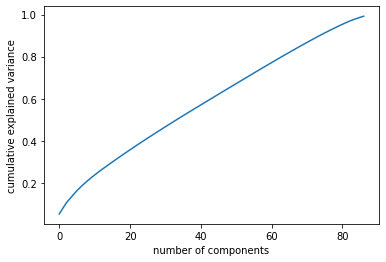

In [92]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Decision Tree

In [93]:
import itertools
def plot_confusion_matrix(cm, classes, ax,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)
    print('')

    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.sca(ax)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

In [94]:
print(X_train_pca.shape)
print(X_test_pca.shape)
print(y_train.shape)
print(y_test.shape)

(14653, 87)
(34189, 87)
(14653,)
(34189,)


[[25724   270]
 [  258  7937]]



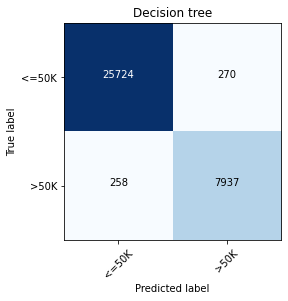

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
tree = DecisionTreeClassifier()
tree.fit(X_train_pca, y_train)
y_pred_tree = tree.predict(X_test_pca)

cm_tree = confusion_matrix(y_test, y_pred_tree)
fig, ax = plt.subplots()
plot_confusion_matrix(cm_tree, classes=np.unique(y), ax=ax,
                      title='Decision tree')

In [96]:
print('Single Decision Tree score on Train Set: ' + str(tree.score(X_train_pca, y_train)))
print('Single Decision Tree score on Test Set: ' + str(tree.score(X_test_pca, y_test)))

Single Decision Tree score on Train Set: 1.0
Single Decision Tree score on Test Set: 0.984556436280675


Decision Tree has an outstanding score at nearly 1.0 o Train Set. However, it may have Overfitting issue that we have to find out more. And another downside is that its score is only fair enough on Test set at 0.785 comparing with its performance on Train set.

## Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'income vs race')

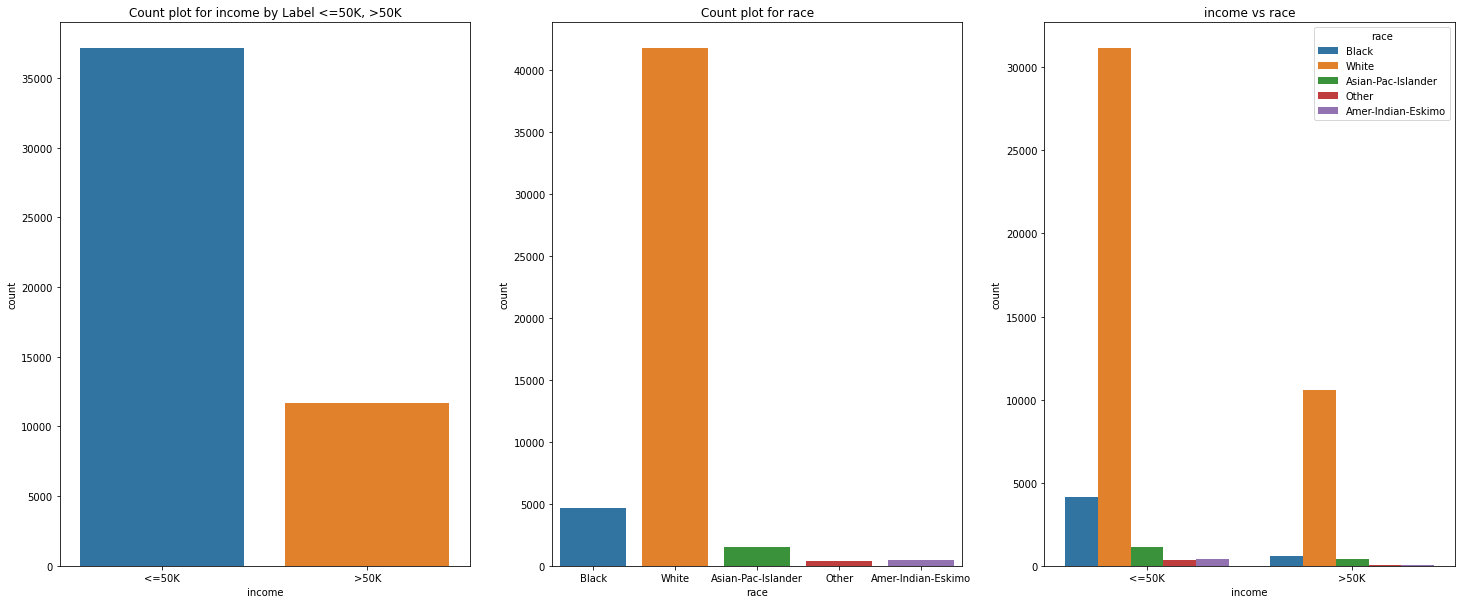

In [99]:
plt.figure(figsize=(25,10))

plt.subplot(1,3,1)
sns.countplot(df.income) 
plt.title('Count plot for income by Label <=50K, >50K')

plt.subplot(1,3,2)
sns.countplot(df['race'])
plt.title('Count plot for race')

plt.subplot(1,3,3)
sns.countplot(x="income", hue="race", data=df)
plt.title('income vs race')

#### Count plot for Income by Labels

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for income by Label <=50K, >50K')

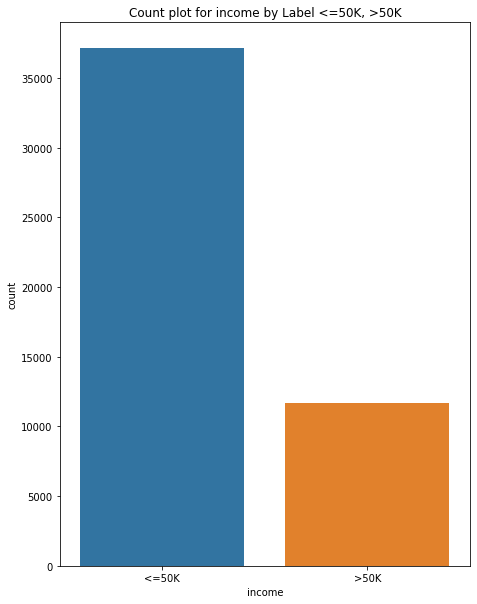

In [103]:
plt.figure(figsize=(25,10))

plt.subplot(1,3,1)
sns.countplot(df.income) 
plt.title('Count plot for income by Label <=50K, >50K')

### Hot Encoding for Income

In [111]:
df_full['income'] = df_full['income'].map({'<=50K': 0,'>50K': 1})

In [112]:
df_full.head(5)

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Single,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,1
1,38,Private,HS-grad,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,1
2,28,Local-gov,Assoc-acdm,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,0
3,44,Private,Some-college,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,0
4,18,Private,Some-college,Single,Prof-specialty,Own-child,White,Female,0,0,30,United-States,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for income by Label <=50K, >50K')

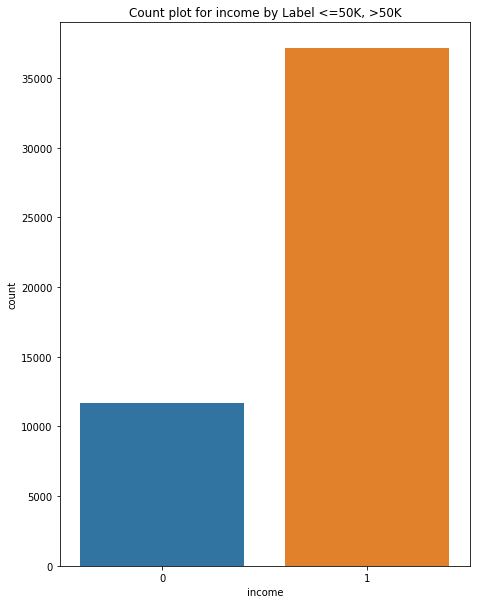

In [113]:
plt.figure(figsize=(25,10))

plt.subplot(1,3,1)
sns.countplot(df_full.income) 
plt.title('Count plot for income by Label <=50K, >50K')

### Count plot for Occupation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for occupation')

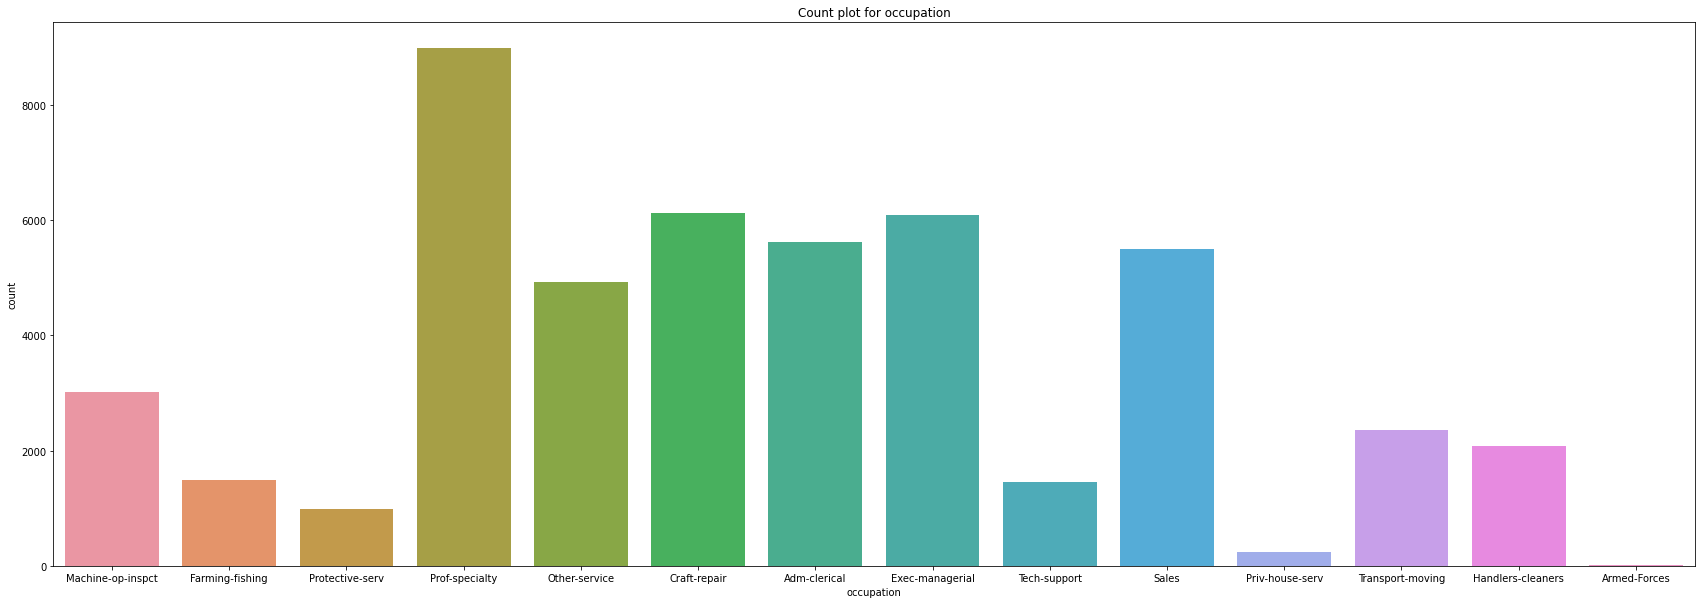

In [110]:
plt.figure(figsize=(100,10))
plt.subplot(1,3,2)
sns.countplot(df['occupation'])
plt.title('Count plot for occupation')

### Count plot for Income vs Occupation

Text(0.5, 1.0, 'income vs occupation')

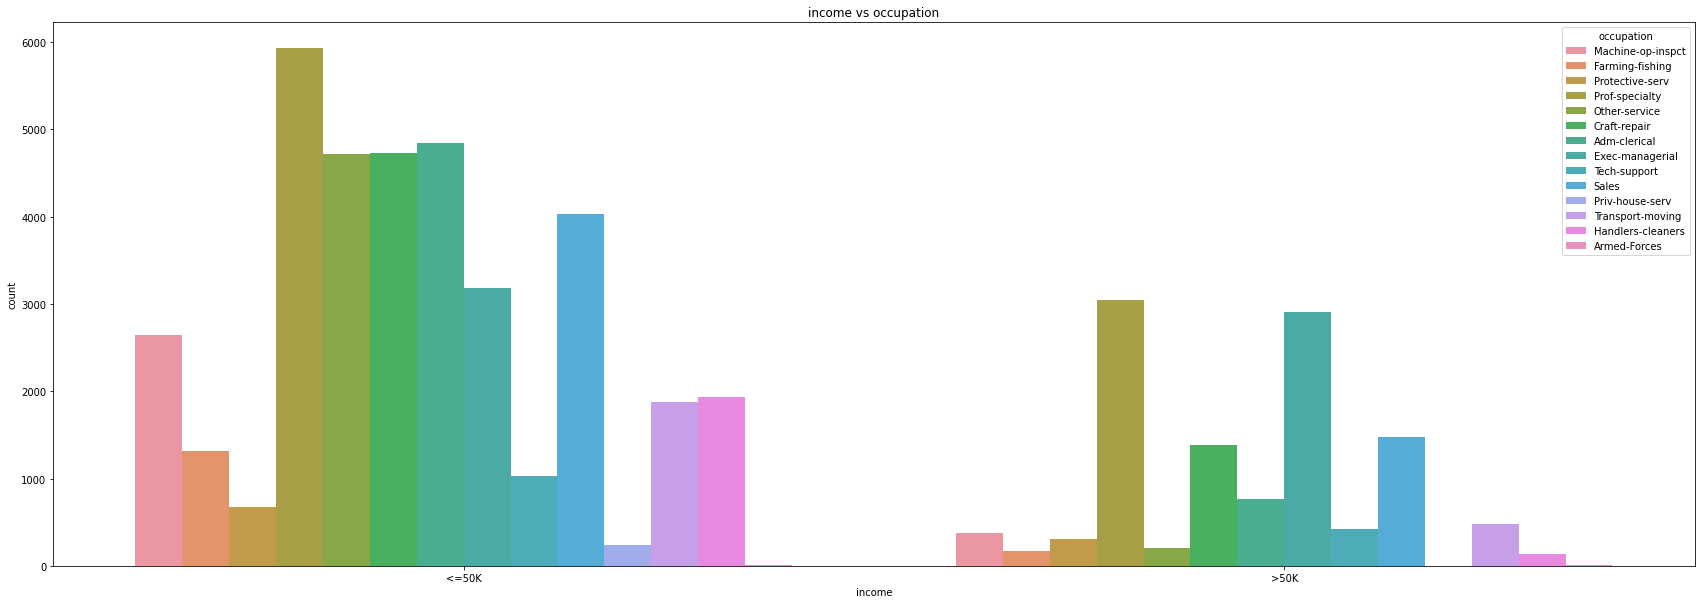

In [109]:
plt.figure(figsize=(100,10))
plt.subplot(1,3,3)
sns.countplot(x="income", hue="occupation", data=df)
plt.title('income vs occupation')